In [91]:
import pandas as pd
import numpy as np
import seaborn as sns

In [92]:
df = pd.read_csv("diabetes.csv")

In [93]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
s = SMOTE()

In [97]:
x_sampled, y_sampled = s.fit_resample(x,y)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.25,random_state=42)

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [101]:
import tensorflow.keras as tk

model = tk.Sequential()

model.add(tk.layers.Input(shape=(8,)))

model.add(tk.layers.Dense(units=8, activation="relu", kernel_initializer="he_uniform"))
model.add(tk.layers.Dense(units=5, activation="relu", kernel_initializer="he_uniform"))
model.add(tk.layers.Dense(units=1, activation="sigmoid", kernel_initializer="he_uniform"))




In [102]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
history = model.fit(
    x_train_scaled,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5013 - loss: 0.7036 - val_accuracy: 0.5240 - val_loss: 7.6960
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.7015 - val_accuracy: 0.5280 - val_loss: 6.9660
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.7000 - val_accuracy: 0.5440 - val_loss: 6.4361
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.6988 - val_accuracy: 0.5400 - val_loss: 6.0488
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4987 - loss: 0.6980 - val_accuracy: 0.5400 - val_loss: 5.7152
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.6972 - val_accuracy: 0.5400 - val_loss: 5.4944
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 0.6966 - val_accuracy: 0.5320 - val_loss: 5.3579
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4893 - loss: 0.6962 - val_accuracy: 0.5360 - val_loss:

In [104]:
y_pred_prob = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [105]:

scores = model.evaluate(x_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


compile_metrics: 62.00%


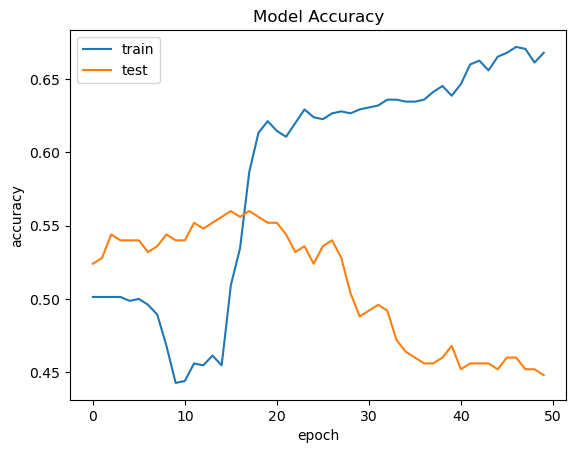

In [108]:
import matplotlib.pyplot as plt

# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
